In [1]:
%%html
<link rel="stylesheet" type="text/css" href="css/rise.css" />

# K-Nearest Neighbors (KNN) Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12

Some imagess from **An Introduction to Statistical Learning**
available at https://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf

K-Nearest Neighbors (KNN) regression

Model prediction is the mean of the K nearest data points.

![](images/knn-vs-line.png)

KNN can be used to model any kind of relation.

![](images/knn-curve.png)

Consider data with multiple features.

True relationship (blue) and linear model (yellow).

![](images/ols-surface.png)

KNN models for multiple features.

![](images/knn-surface.png)

# Diabetes dataset

In [3]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [4]:
# features (X) are already mean subtracted and normalized
X = diabetes.data
# target disease progression values are NOT mean subtraced or normalized
y = diabetes.target

X.shape, y.shape

((442, 10), (442,))

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Fit the diabetes dataset using a KNN model with K=3

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
knn3 = KNeighborsRegressor(n_neighbors=3)

knn3.fit(X, y);

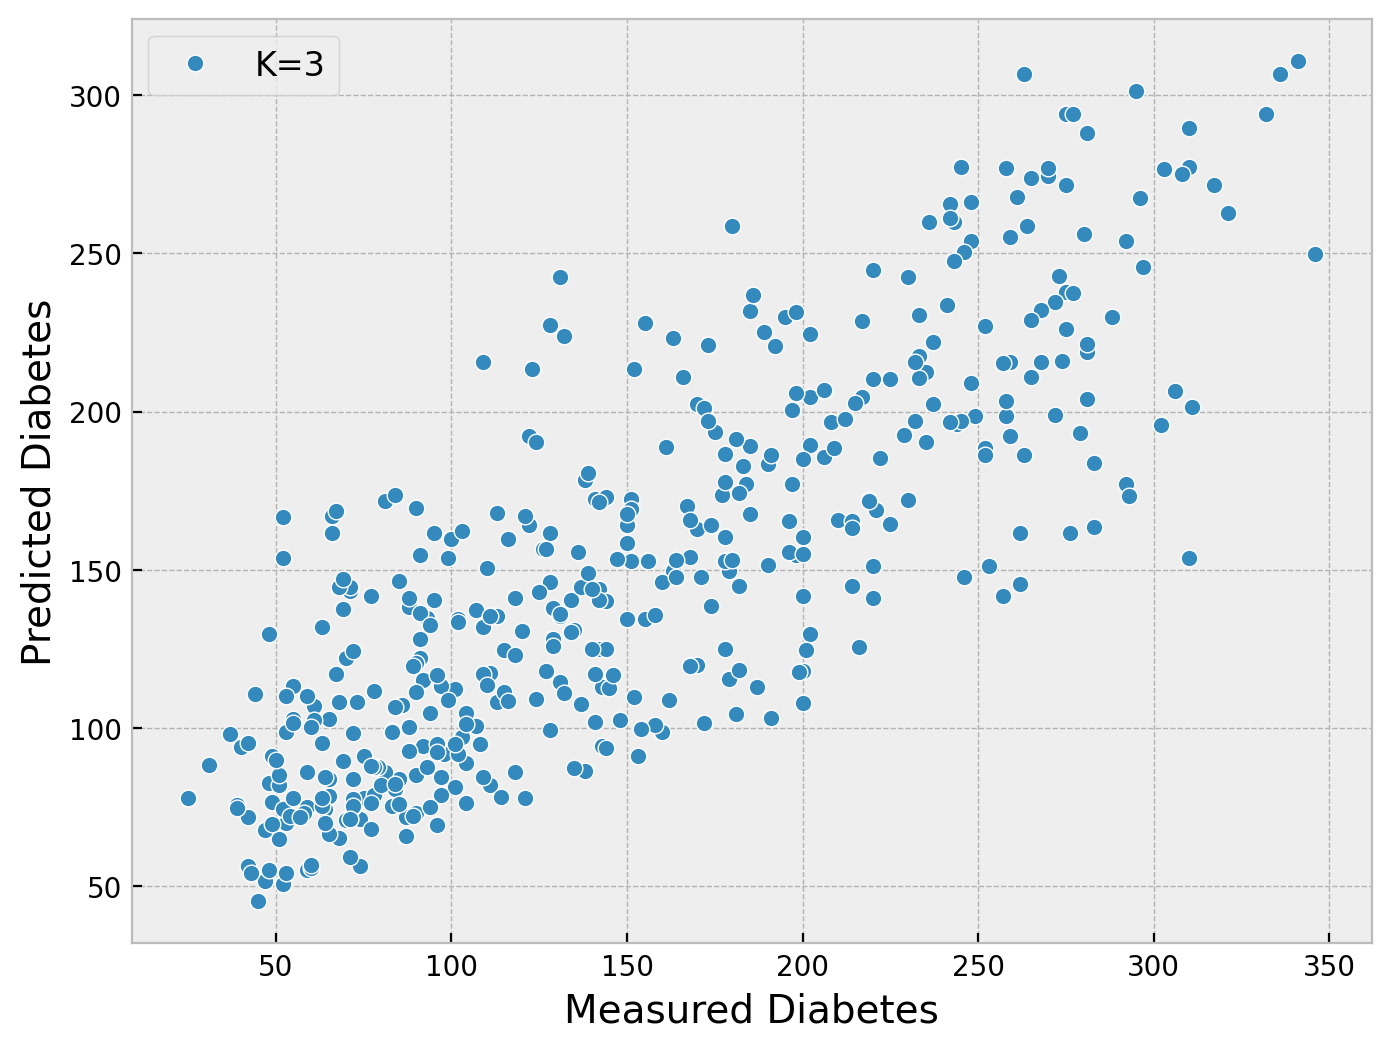

In [8]:
plt.plot(y, knn3.predict(X), 'o', label='K=3')
plt.xlabel('Measured Diabetes')
plt.ylabel('Predicted Diabetes')
plt.legend();

But how many neighbors should we consider? i.e. K = ?

K is a hyperparameter that defines one of many possible KNN models.

Compare two different values for K.

In [9]:
models = [
    KNeighborsRegressor(n_neighbors=2),
    KNeighborsRegressor(n_neighbors=50)
]

for model in models:
    model.fit(X, y);

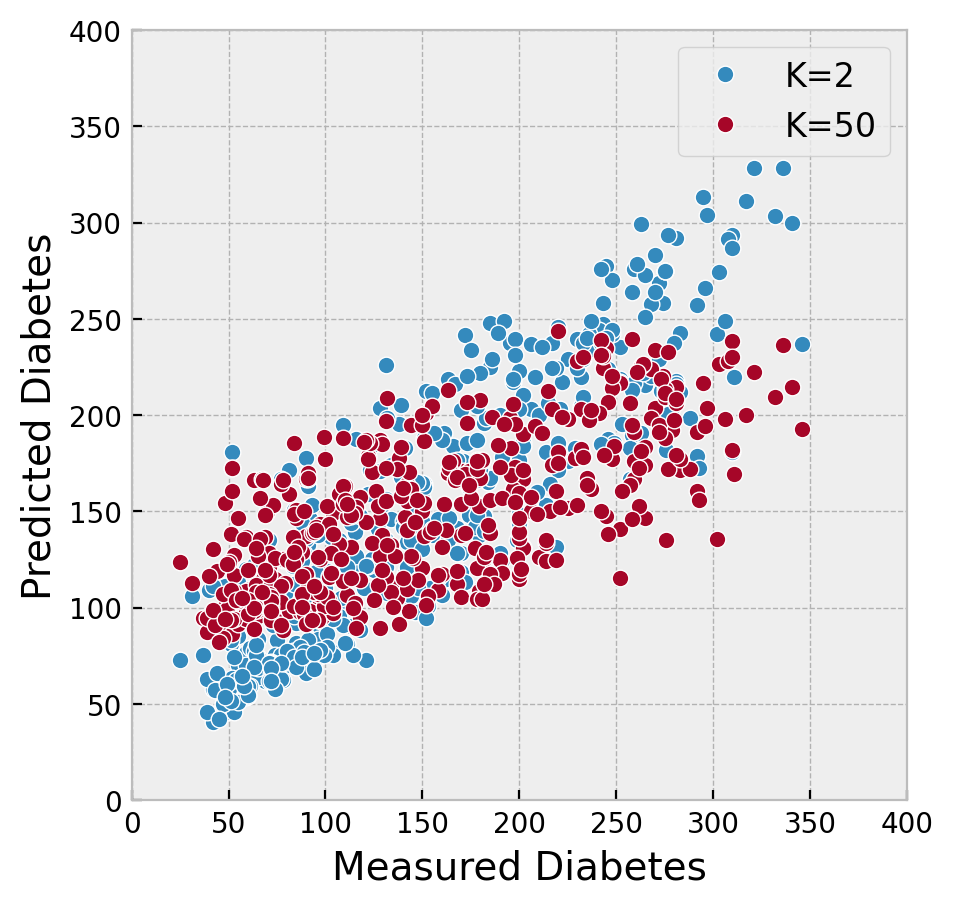

In [10]:
plt.figure(figsize=(5,5))
for model in models:
    plt.plot(y, model.predict(X), 'o', label=f'K={model.n_neighbors}')
plt.xlim([0, 400]);
plt.ylim([0, 400]);
plt.xlabel('Measured Diabetes')
plt.ylabel('Predicted Diabetes')
plt.legend();